In [80]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Regression\house_prices_single_model')

In [81]:
import yaml
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Regression\house_prices_single_model\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read Dataset

In [83]:
X_train = pd.read_parquet(r'..\data\processed\feat_X_train.parquet')
y_train = pd.read_parquet(r'..\data\processed\feat_y_train.parquet')

In [84]:
X_train.drop(columns=config['model_selection']['cols_2_drop'], inplace=True)

In [85]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

,numerical_pipe__OverallQual,numerical_pipe__GrLivArea,numerical_pipe__GarageAreaMod,numerical_pipe__1stFlrSF,numerical_pipe__YearBuilt,categorical_pipe__ExterQual_TA,categorical_pipe__ExterQual_Gd,categorical_pipe__Foundation_PConc,categorical_pipe__Foundation_CBlock,categorical_pipe__BsmtQual_TA,categorical_pipe__BsmtQual_Gd,categorical_pipe__Heating_GasA,categorical_pipe__CentralAir_Y,categorical_pipe__KitchenQual_TA,categorical_pipe__KitchenQual_Gd,categorical_pipe__GarageFinish_Unf,categorical_pipe__GarageFinish_Fin,SalePrice
979,5,1121.0,480.0,1121.0,7.582229,1,0,1,0,1,0,1,1,1,0,1,0,139000
357,5,1142.0,528.0,1142.0,7.588830,1,0,1,0,0,1,1,1,1,0,0,1,134000
1318,8,1787.0,748.0,1787.0,7.601402,0,1,1,0,0,1,1,1,0,1,0,0,275000
346,6,958.0,301.0,958.0,7.580700,1,0,0,1,1,0,1,1,1,0,0,0,151500
1284,6,2447.0,336.0,1699.0,7.559559,1,0,1,0,1,0,1,1,0,1,1,0,169000


In [86]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (1095, 18)


# Graphs

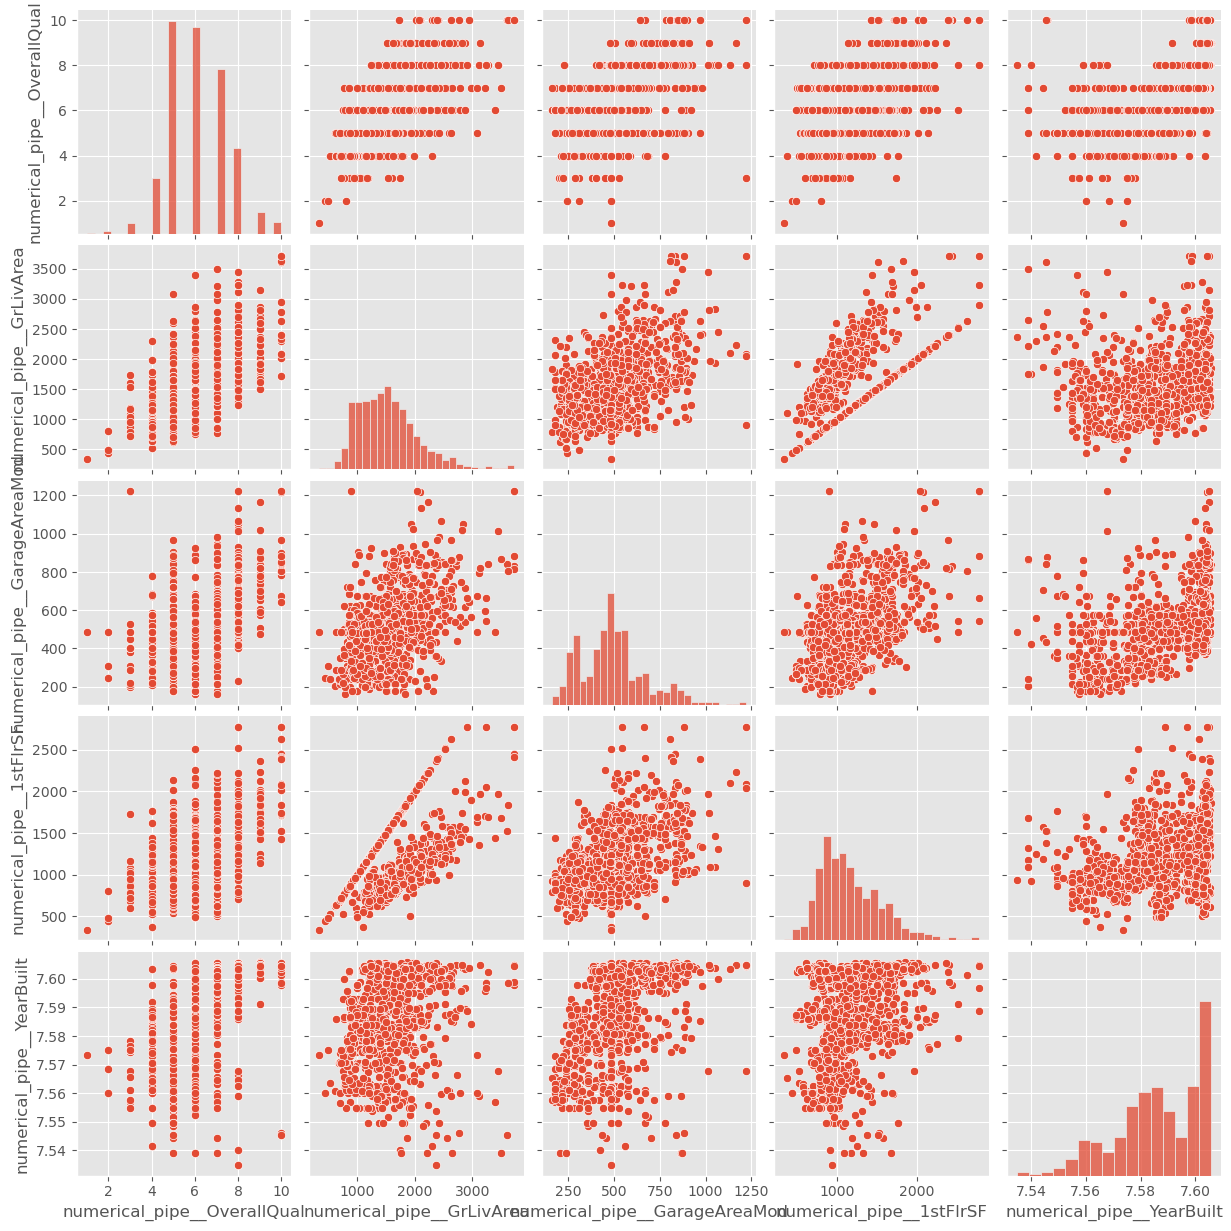

In [87]:
sns.pairplot(df.filter(like='numerical_pipe'))

In [88]:
# for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
#     print(col)
#     sns.boxplot(data=df, x='SalePrice', hue=col)
#     plt.show()

categorical_pipe__ExterQual_TA


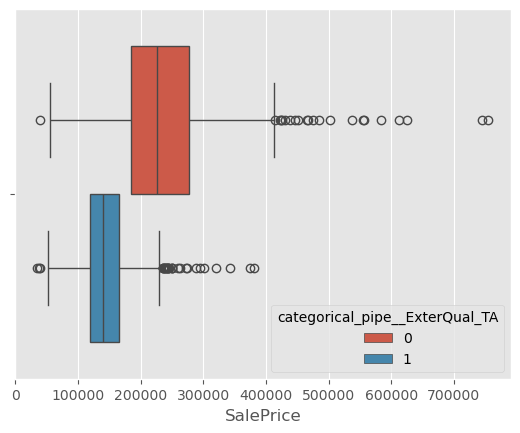

categorical_pipe__ExterQual_Gd


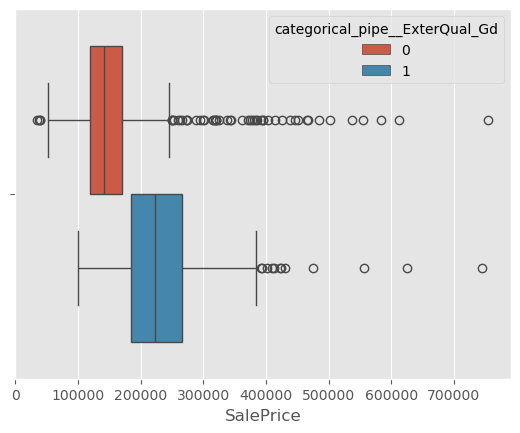

categorical_pipe__Foundation_PConc


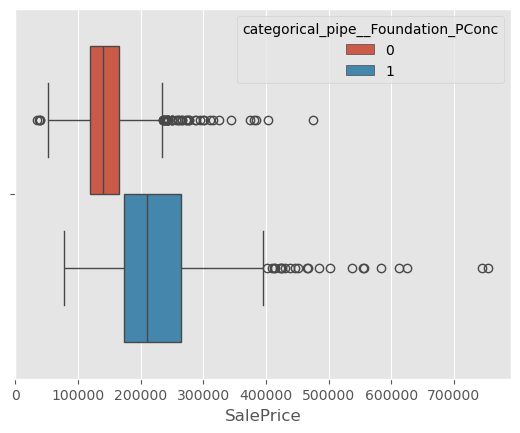

categorical_pipe__Foundation_CBlock


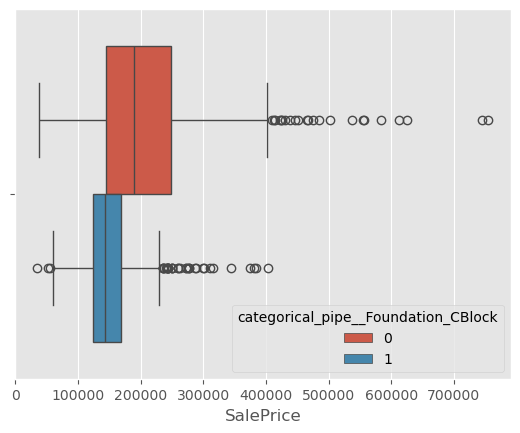

categorical_pipe__BsmtQual_TA


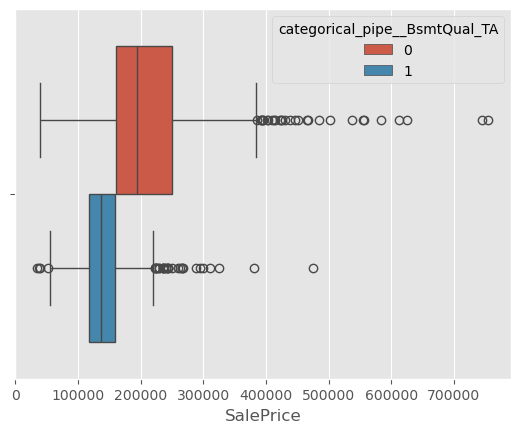

categorical_pipe__BsmtQual_Gd


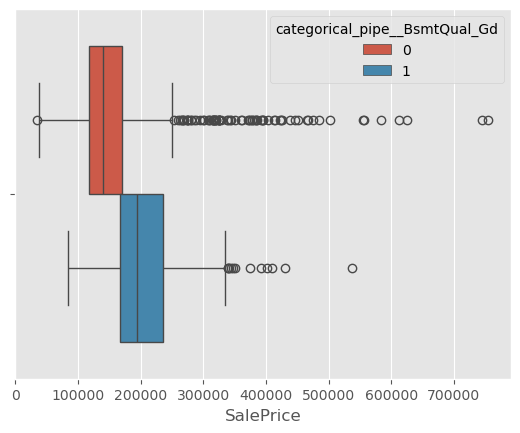

categorical_pipe__Heating_GasA


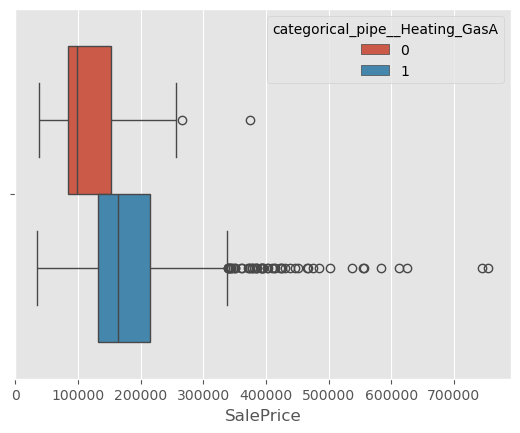

categorical_pipe__CentralAir_Y


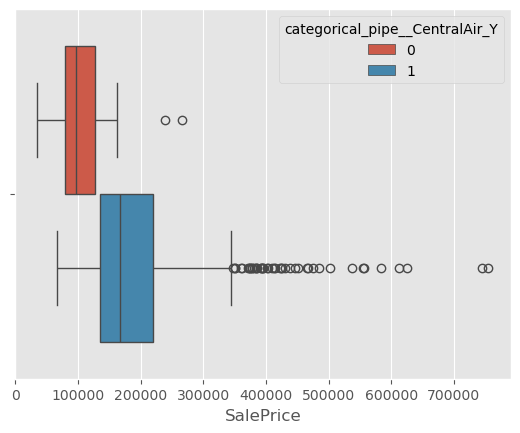

categorical_pipe__KitchenQual_TA


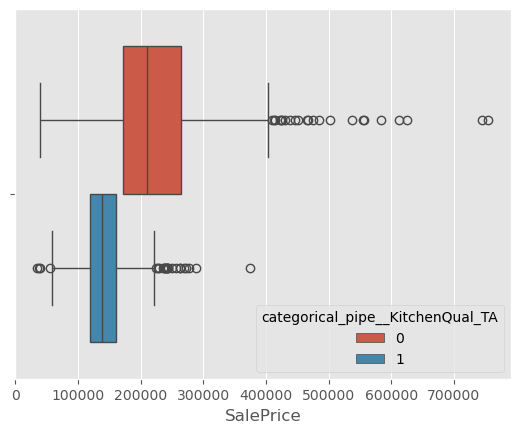

categorical_pipe__KitchenQual_Gd


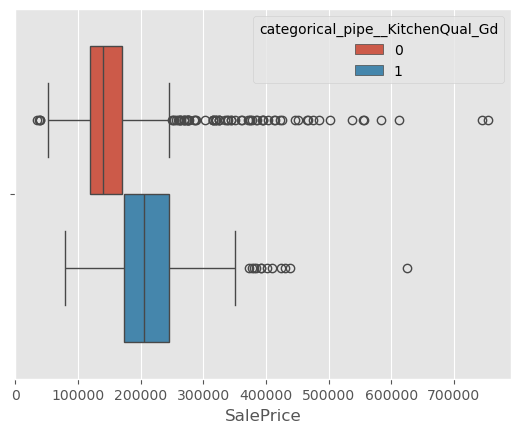

categorical_pipe__GarageFinish_Unf


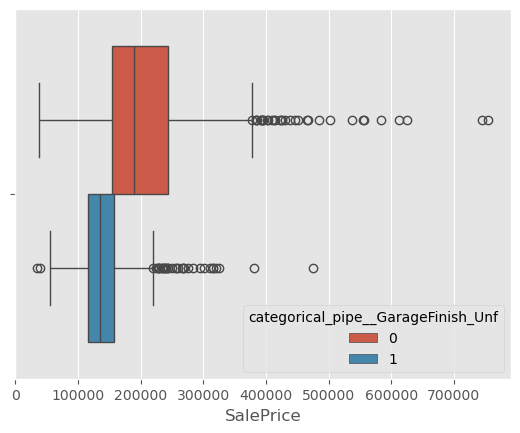

categorical_pipe__GarageFinish_Fin


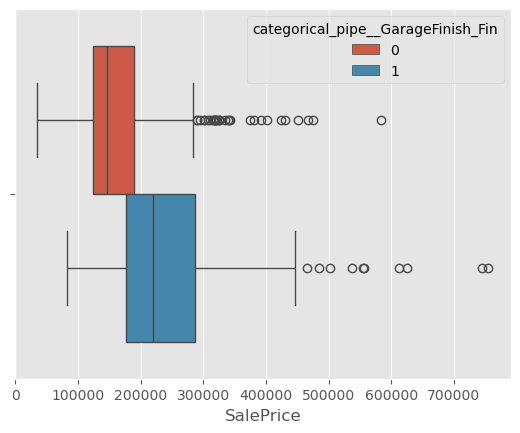

In [89]:
for col in X_train.columns[X_train.columns.str.contains('categorical_pipe')]:
    print(col)
    sns.boxplot(data=df, x='SalePrice', hue=col)
    plt.show()

numerical_pipe__OverallQual


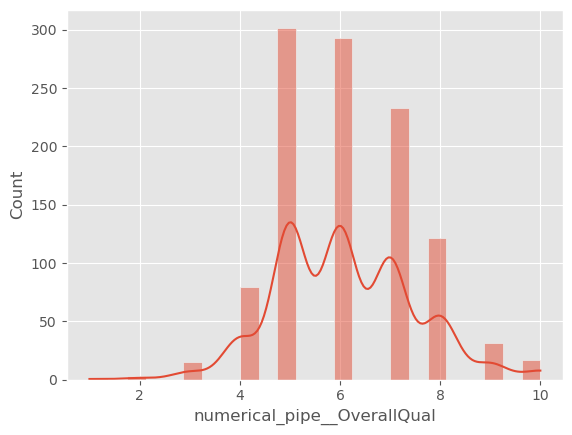

numerical_pipe__GrLivArea


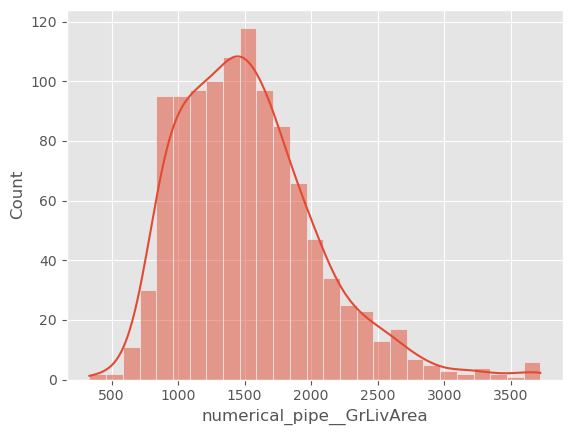

numerical_pipe__GarageAreaMod


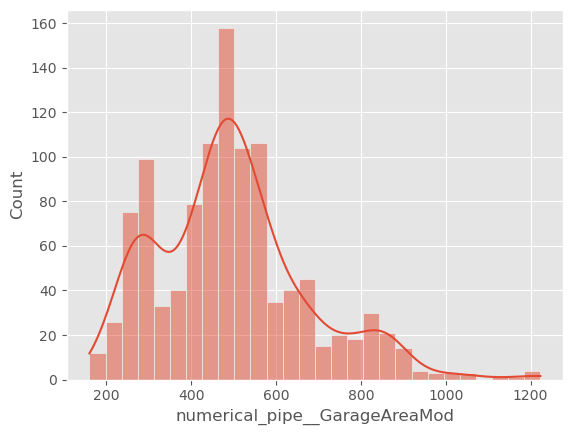

numerical_pipe__1stFlrSF


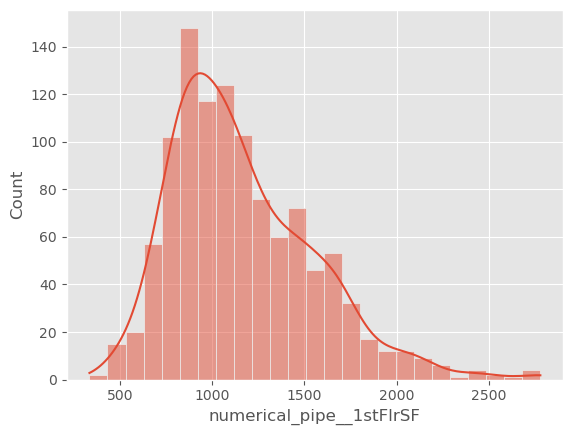

numerical_pipe__YearBuilt


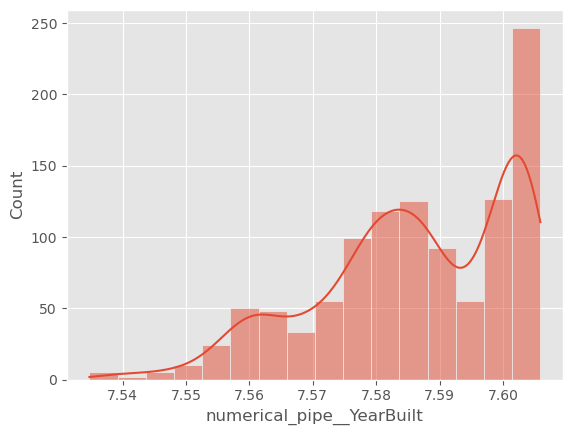

In [90]:
for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
    print(col)
    sns.histplot(data=X_train[col], kde=True)
    plt.show()

<Axes: ylabel='Count'>

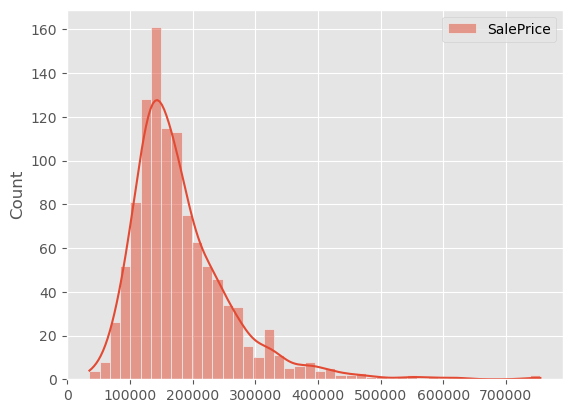

In [91]:
sns.histplot(y_train, kde=True)

In [92]:
df.columns

Index(['numerical_pipe__OverallQual', 'numerical_pipe__GrLivArea',
       'numerical_pipe__GarageAreaMod', 'numerical_pipe__1stFlrSF',
       'numerical_pipe__YearBuilt', 'categorical_pipe__ExterQual_TA',
       'categorical_pipe__ExterQual_Gd', 'categorical_pipe__Foundation_PConc',
       'categorical_pipe__Foundation_CBlock', 'categorical_pipe__BsmtQual_TA',
       'categorical_pipe__BsmtQual_Gd', 'categorical_pipe__Heating_GasA',
       'categorical_pipe__CentralAir_Y', 'categorical_pipe__KitchenQual_TA',
       'categorical_pipe__KitchenQual_Gd',
       'categorical_pipe__GarageFinish_Unf',
       'categorical_pipe__GarageFinish_Fin', 'SalePrice'],
      dtype='object')

C:\Users\gustavo\AppData\Local\Temp\ipykernel_21472\3120116330.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


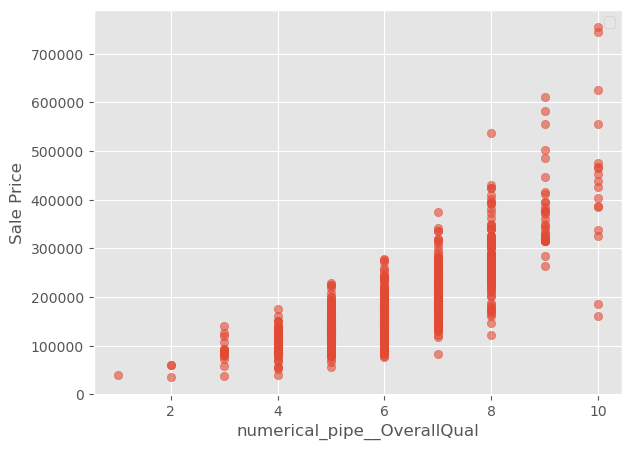

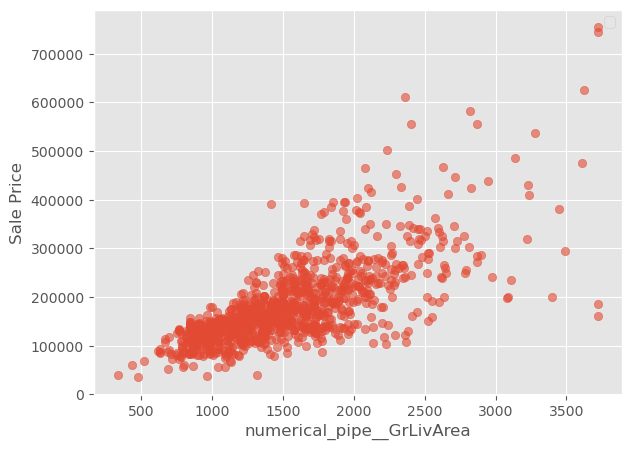

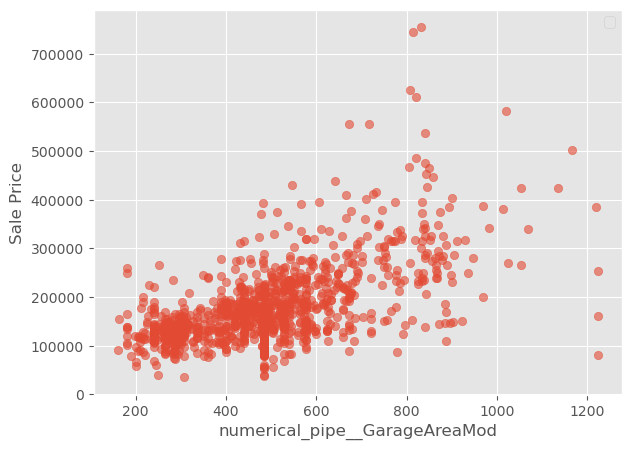

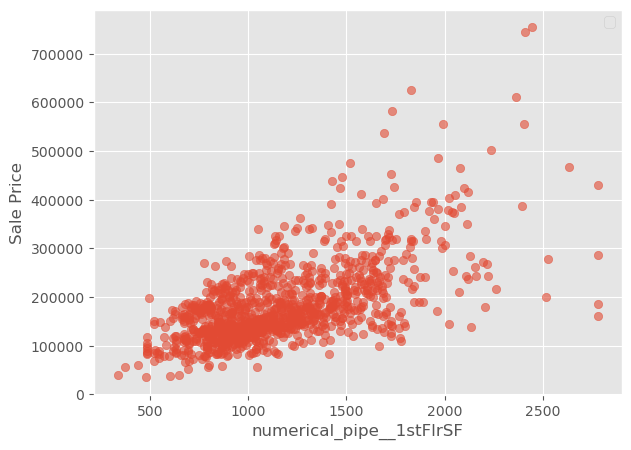

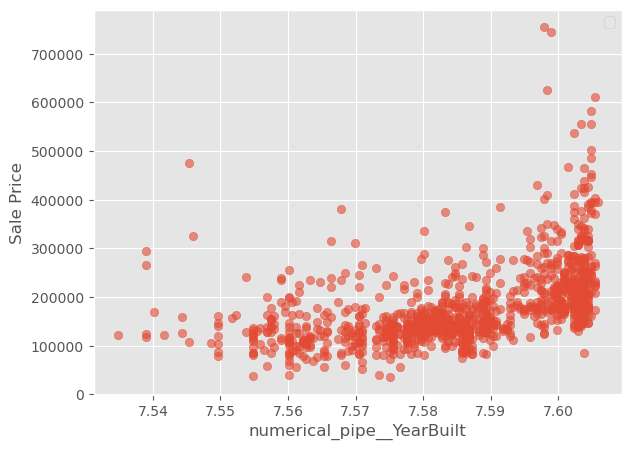

In [93]:
for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(df[col], df['SalePrice'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Sale Price')

    # Add some guidelines to spot outliers
    # plt.axvline(x=4000, color='red', linestyle='--', alpha=0.7, label='Potential outlier threshold')
    plt.legend()